# Coding Exercises (Part 9)

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also watch the __solutions videos__ or check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Pandas: Advanced Topics


### Exercise 9: GroupBy Operations

In [1]:
#run the cell!
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format = '{:.2f}'.format

/tmp/ipykernel_25142/3509115474.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
#run the cell!
listings = pd.read_csv("listings_clean.csv")

In [3]:
#run the cell!
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


In [4]:
#run the cell!
listings.tail()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,681919062.56,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2147266454.00,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,504078206.26,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,165399468.60,2015,Health Care,Major Pharmaceuticals
6851,ZYXI,NASDAQ,"Zynex, Inc.",5.02,161834880.48,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [5]:
#run the cell!
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      6852 non-null   object 
 1   Exchange    6852 non-null   object 
 2   Name        6852 non-null   object 
 3   Last_Price  6745 non-null   float64
 4   Market_Cap  5954 non-null   float64
 5   IPO_Year    6852 non-null   int64  
 6   Sector      5309 non-null   object 
 7   Industry    5309 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 428.4+ KB


83. __Group__ listings by the column __Exchange__ and __calculate__ the __mean__/average __Last_Price__ for each Exchange (mean price for nyse, for nasdaq and for amex)! <br>
__Fill in the gaps!__ Which Exchange has, on average, the highest prices?

In [6]:
listings.groupby("Exchange").Last_Price.mean()

Exchange
AMEX     25.30
NASDAQ   32.30
NYSE     44.34
Name: Last_Price, dtype: float64

The highest prices are ... on NYSE.

84. __Group__ listings by the column __Sector__ and return the __highest/maximum Market_Cap__ that can be found on each Sector! <br> __Fill in the gaps__! What is the __Market Cap__ of the largest company in the Sector __Consumer Durables__ (divide by 1 Mio. to grasp large numbers!)?

In [8]:
listings.groupby('Sector').Market_Cap.max()/1000000

Sector
Basic Industries        261790.32
Capital Goods           206002.05
Consumer Durables        41864.35
Consumer Non-Durables   199393.52
Consumer Services       907413.83
Energy                  345390.49
Finance                 342130.11
Health Care             361018.64
Miscellaneous           482638.79
Public Utilities        242059.30
Technology              945979.47
Transportation          184992.60
Name: Market_Cap, dtype: float64

The Market Cap is ... 41.86 billion US-Dollar

85. __Count__ the __amount of listings__ per IPO_Year (hint: count __Symbols__) and __save__ the new DataFrame in the variable __listings_per_year__! __Fill in the gaps!__ <br>

In [13]:
listings_per_year = listings.groupby('IPO_Year').Symbol.count()

In [14]:
# run the cell!
listings_per_year

IPO_Year
1969    3747
1972       2
1973       1
1980       2
1981       5
1982       2
1983      11
1984       3
1985       4
1986      36
1987      28
1988      18
1989      17
1990       9
1991      31
1992      61
1993      77
1994      48
1995      33
1996      55
1997      62
1998      40
1999      61
2000      43
2001      27
2002      62
2003      55
2004      95
2005      68
2006      68
2007      84
2008      11
2009      40
2010      84
2011      94
2012     110
2013     186
2014     272
2015     216
2016     195
2017     307
2018     396
2019      86
Name: Symbol, dtype: int64

86. Create a __lineplot__ for __listings_per_year__ (exclude 1969!)!

<Axes: xlabel='IPO_Year'>

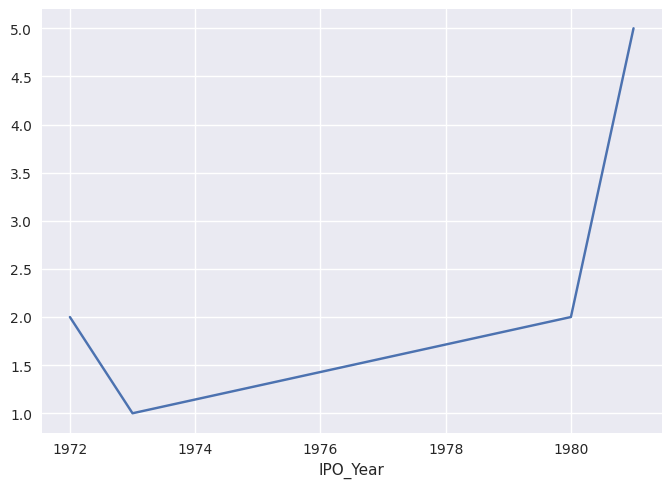

In [28]:
row_other_than_1969= listings_per_year.head().iloc[1:]
row_other_than_1969.plot()
# listings_per_year[:1].plot()
# plt.show()

87. __Group__ listings by the columns __IPO_Year and Sector__ and count the number of listings per group (hint: count Symbol)!<br> __Save__ the resulting DataFrame in the variable __matrix__!


In [32]:
matrix = listings.groupby(by=['IPO_Year','Sector']).Symbol.count()

In [33]:
# run the cell
matrix

IPO_Year  Sector               
1969      Basic Industries         207
          Capital Goods            236
          Consumer Durables         89
          Consumer Non-Durables    143
          Consumer Services        409
                                  ... 
2019      Health Care               21
          Miscellaneous              1
          Public Utilities           2
          Technology                 1
          Transportation             1
Name: Symbol, Length: 372, dtype: int64

88. __Rearrange__ matrix by __unstacking Sector__! Use 0 (zero) as fill_value! __Fill in the gaps!__

In [34]:
matrix = matrix.unstack(fill_value = 0)

In [35]:
# run the cell!
matrix.head()

Sector,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
IPO_Year,,,,,,,,,,,,
1969,207,236,89,143,409,151,604,348,72,159,214,60
1972,0,0,0,1,0,0,0,0,0,0,1,0
1973,1,0,0,0,0,0,0,0,0,0,0,0
1980,0,1,0,0,0,0,0,0,0,0,1,0
1981,0,1,0,0,1,0,1,2,0,0,0,0


89. __Select__ all rows/listings with __IPO_Year__ from 1990 (incl.) till today and __save__ the new DataFrame in the variable __matrix1__! 

In [38]:
matrix1 = matrix.loc["1990":]

In [39]:
# run the cell!
matrix1

Sector,Basic Industries,Capital Goods,Consumer Durables,Consumer Non-Durables,Consumer Services,Energy,Finance,Health Care,Miscellaneous,Public Utilities,Technology,Transportation
IPO_Year,,,,,,,,,,,,
1990,1,1,0,0,0,1,0,1,0,0,2,0
1991,0,2,1,1,6,0,4,5,0,0,4,1
1992,2,4,0,1,9,1,4,8,2,0,6,1
1993,3,8,4,6,18,2,2,1,0,0,10,1
1994,5,5,2,1,11,1,2,3,1,4,9,1
1995,1,4,1,3,7,2,2,2,0,1,10,0
1996,5,3,1,7,8,1,3,6,0,1,18,2
1997,1,8,5,3,9,2,4,7,1,3,12,4
1998,0,2,1,2,2,1,4,4,3,1,9,0


Congrats, you created the DataFrame matrix1 that we visualized in Exercise 7 with a Seaborn Heatmap!

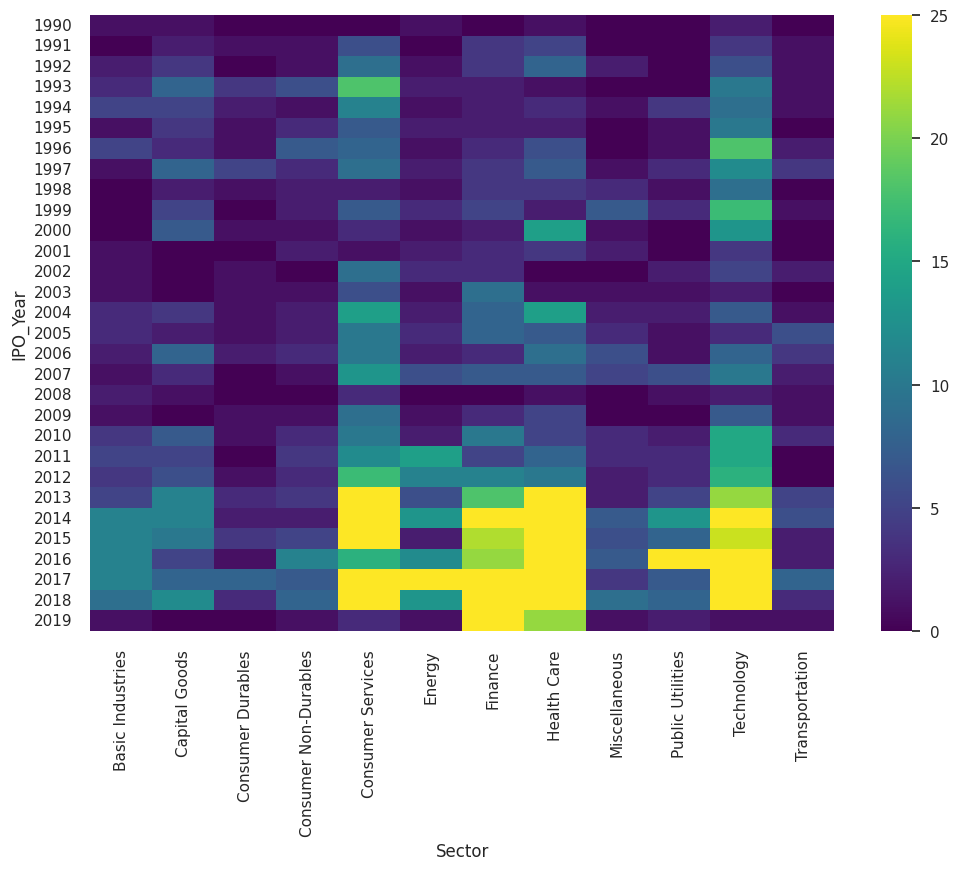

In [40]:
# run and see again!
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.0)
sns.heatmap(matrix1, cmap = "viridis", vmax = 25)
plt.show()

# Well Done!

-------------------

# Hints (Spolier!)

83. group by the "Exchange" column, calculate the mean()

84. listings.---(---).---.max() / 1000000

85. "IPO_Year", Symbol, count()

86. listings_per_year[1:].---

87. matrix = listings.groupby([---, ---]).---.---

88. unstack() method, fill_value parameter

89. matrix1 = matrix.loc[---]